<a href="https://colab.research.google.com/github/arifroska/PrakAPM/blob/main/Simple_Linear_Regression_APM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import data
from google.colab import files
uploaded = files.upload()

Saving avg_rainfalltemp in UK - Sheet1.csv to avg_rainfalltemp in UK - Sheet1.csv


In [ ]:
#membaca data
import io
import pandas as pd
data = pd.read_csv(io.BytesIO(uploaded['avg_rainfalltemp in UK - Sheet1.csv']))
data.head()

,Year,Type of period,Period,Avg rainfall(in mm),Avg temp(in centigrade)
0,2010,Monthly,JAN,69.5,0.8
1,2010,Monthly,FEB,71.7,1.6
2,2010,Monthly,MAR,65.1,5.5
3,2010,Monthly,APR,21.4,8.2
4,2010,Monthly,MAY,22.1,9.8


In [ ]:
#melakukan grouping data berdasarkan tahun dan memilih data yang akan digunakan
data_group = data[['Year','Avg rainfall(in mm)']].groupby('Year').mean().sort_values(by='Year').reset_index()
data_group = data_group.rename(columns={'Avg rainfall(in mm)': 'Curah_Hujan'})
print (data_group)

   Year  Curah_Hujan
0  2010   133.017647
1  2011   114.676471
2  2012   181.041176
3  2013   127.488235
4  2014   147.605882
5  2015   138.800000
6  2016   143.794118
7  2017   132.035294
8  2018   126.505882
9  2019   160.441176


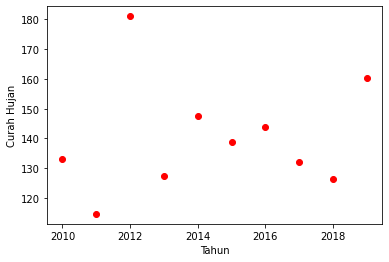

In [ ]:
#menampilkan data asli dengan scatter plot
import matplotlib.pyplot as plt

%matplotlib inline
plt.xlabel('Tahun')
plt.ylabel('Curah Hujan')
plt.scatter(data_group.Year, data_group.Curah_Hujan, color='red')

In [ ]:
#menyimpan data ke dalam array numpy
import numpy as np
from sklearn.linear_model import LinearRegression

x = np.array(data_group['Year']).reshape((-1, 1))
y = np.array(data_group['Curah_Hujan'])

print (x)
print (y)

[[2010]
 [2011]
 [2012]
 [2013]
 [2014]
 [2015]
 [2016]
 [2017]
 [2018]
 [2019]]
[133.01764706 114.67647059 181.04117647 127.48823529 147.60588235
 138.8        143.79411765 132.03529412 126.50588235 160.44117647]


In [ ]:
#membagi data train dan data test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
#melakukan proses regresi
model = LinearRegression().fit(x_train, y_train)
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: -0.1721053719134178
intercept: -6466.912432370206
slope: [3.27850812]


In [ ]:
#mencari nilai prediksi dari data test
y_pred = model.predict(x_test)
print('predicted response:', y_pred, sep='\n')

predicted response:
[129.44589617 149.11694486]


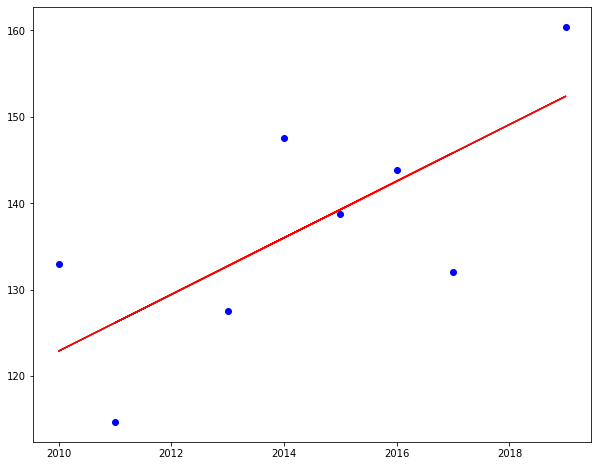

In [ ]:
#menampilkan hasil training data
plt.figure(figsize=(10,8))
plt.scatter(x_train, y_train, color = 'blue')
plt.plot(x_train, model.predict(x_train), color='red')
plt.show()

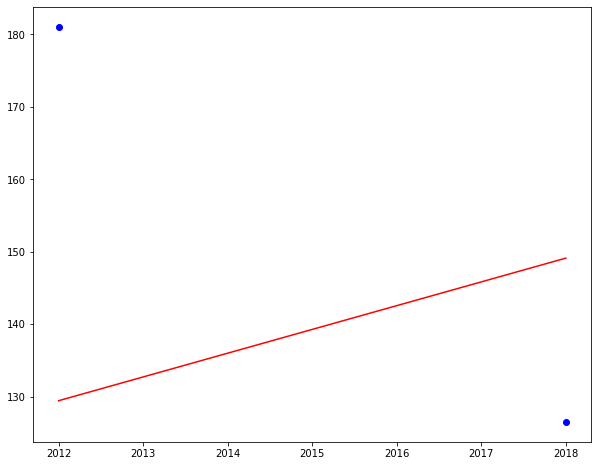

In [ ]:
#menampilkan hasil data test
plt.figure(figsize=(10,8))
plt.scatter(x_test, y_test, color = 'blue')
plt.plot(x_test, model.predict(x_test), color='red')
plt.show()

In [ ]:
#membandingkan nilai asli dan prediksi
baru = pd.DataFrame({'Nilai asli' : y_test, 'Nilai Prediksi' : y_pred})
baru

,Nilai asli,Nilai Prediksi
0,181.041176,129.445896
1,126.505882,149.116945


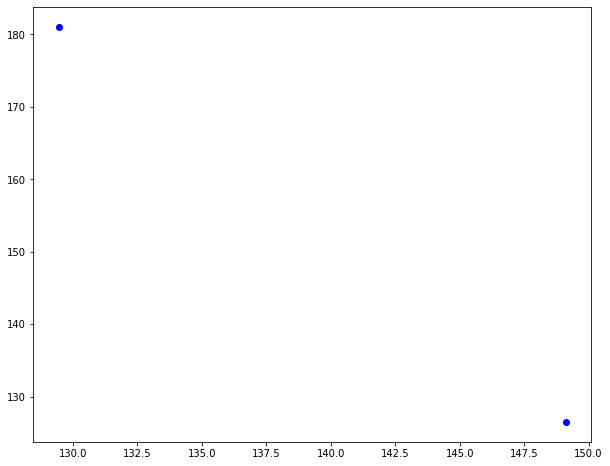

In [ ]:
#menampilkan nilai asli dan nilai prediksi
plt.figure(figsize=(10,8))
plt.scatter(y_pred, y_test, color = 'blue')
plt.show()